# Data Analysis

## Spark + MongoDB

In [131]:
from pyspark.sql import SparkSession
from operator import add
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
import random

In [40]:
def sort_1(e):
    return e[0]

def sort_2(e):
    return e[1]
#"spark://localhost:7077"
spark = SparkSession.builder\
    .appName("spark_test_pandas")\
    .master("local") \
    .config("spark.jars.packages", "org.mongodb.spark:mongo-spark-connector_2.12:10.1.1")\
    .config("spark.mongodb.read.connection.uri", "mongodb://192.168.2.6:27117/MSS.songs")\
    .getOrCreate()
spark_context = spark.sparkContext

In [41]:
sdf = spark\
.read.format("mongodb")\
.option("uri", "mongodb://192.168.2.6:27117/MSS.songs").load()

In [42]:
sdf.show()

23/03/17 18:20:08 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
+--------------------+--------------------+----------------+-----------------+-------------------+-------------------+--------------------+---------------+--------------------+----------------+--------------------+--------------------+---------------+--------------------+------------+---------+--------------+------+-----+-----------------+----------------+-------------------+--------------+--------------------+---------------+-----------------------+------------------+-----------------------+-------------------------+------------------------------+---------------------------+--------------------+------------------+-------------------+-------------------+---------------------+----------------+---+--------------+--------+----+---------------+--------------------+------------------+-------------------+----------

In [101]:
def removearticles(text):
    return re.findall('[a-zA-Z0-9]+', text)

In [46]:
sdf.select('title', 'song_hotttnesss').schema

StructType([StructField('title', StringType(), True), StructField('song_hotttnesss', StringType(), True)])

In [127]:
# select -> rdd
out = sdf.select('title', 'song_hotttnesss').rdd
# replace nan with 0; split words in wordlists;
out2 = out.map(lambda x: (removearticles(x[0][2:-1]), float(x[1]) if x[1] != 'nan' else 0.5)) 
# 
out3_h = out2.flatMap(lambda x: [(i, x[1]) for i in x[0]])
# 
out3_c = out2.flatMap(lambda x: [(i, 1) for i in x[0]])
#
out4_h = out3_h.reduceByKey(add).collect()
#
out4_c = out3_c.reduceByKey(add).collect()
#
c_sort = sorted(out4_c, key=sort_2, reverse=True)
#
h_sort = sorted(out4_h, key=sort_2, reverse=True)
#
all_sort = [(i[0], j[1]/i[1]) for i, j in zip(c_sort, h_sort)]
#
#print(sorted(all_sort, key=sort_2, reverse=True))


In [130]:
sorted(all_sort, key=sort_2, reverse=True)

[('Sarank', 0.6320809374994478),
 ('xa9gni', 0.6316008180888096),
 ('Rainin', 0.6313903653184915),
 ('Balao', 0.6310080588180911),
 ('Preta', 0.6294767326751742),
 ('Pretinha', 0.6292127100645375),
 ('Juazeiro', 0.6290718355952272),
 ('Foam', 0.6282179645794025),
 ('Backtrack', 0.6281250584184764),
 ('Swim', 0.6274948536700506),
 ('Actress', 0.6273634475759199),
 ('Channels', 0.6273634475759199),
 ('Cami', 0.6272025955607587),
 ('fait', 0.6270737964039372),
 ('xa9j', 0.6269085853787749),
 ('Quiser', 0.6266128026956008),
 ('Parasitic', 0.6266128026956008),
 ('Twins', 0.6266128026956008),
 ('pasta', 0.6265859803064825),
 ('fagioli', 0.626520938818931),
 ('Tucker', 0.6264642401853926),
 ('Sanddollars', 0.6261657596688281),
 ('Cutting', 0.6259317127151359),
 ('Motel', 0.625865454009952),
 ('Akhan', 0.6254115257921741),
 ('Nay', 0.6249533671840265),
 ('Sharab', 0.6248397909779997),
 ('Leading', 0.6248397909779997),
 ('Str8', 0.6248335335556564),
 ('Lurkin', 0.6247461105191231),
 ('Huo', 0.6

### plot songs per year

Text(0, 0.5, 'Nr of songs')

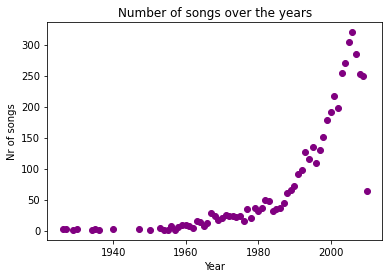

In [5]:
year_freq = sdf.select('Year').rdd\
                .map(lambda x: (x, 1))\
                .reduceByKey(add).collect()
years = [float(i[0][0]) if float(i[0][0])>0 else None for i in year_freq]
years_freq_ =[i[1] for i in year_freq]

plt.plot(years, years_freq_,'o', color='purple')
plt.title('Number of songs over the years')
plt.xlabel('Year')
plt.ylabel('Nr of songs')

### plot song per year with condition

Text(0, 0.5, 'Nr of songs')

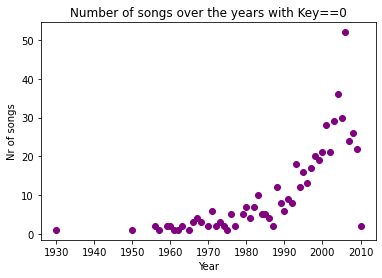

In [7]:
condition = 'Key==0'
year_freq = sdf.where(condition).select('Year').rdd\
                .map(lambda x: (x, 1))\
                .reduceByKey(add).collect()#, key=sort_1, reverse=False)
years = [float(i[0][0]) if float(i[0][0])>0 else None for i in year_freq]
years_freq_ =[i[1] for i in year_freq]

plt.plot(years, years_freq_,'o', color='purple')
plt.title('Number of songs over the years with {}'.format(condition))
plt.xlabel('Year')
plt.ylabel('Nr of songs')

In [17]:
spark.stop()

## perform tests


In [132]:
def data_analyze(sdf):
    # select -> rdd
    out = sdf.select('title', 'song_hotttnesss').rdd
    # replace nan with 0; split words in wordlists;
    out2 = out.map(lambda x: (removearticles(x[0][2:-1]), float(x[1]) if x[1] != 'nan' else random.random())) 
    # 
    out3_h = out2.flatMap(lambda x: [(i, x[1]) for i in x[0]])
    # 
    out3_c = out2.flatMap(lambda x: [(i, 1) for i in x[0]])
    #
    out4_h = out3_h.reduceByKey(add).collect()
    #
    out4_c = out3_c.reduceByKey(add).collect()
    #
    c_sort = sorted(out4_c, key=sort_2, reverse=True)
    #
    h_sort = sorted(out4_h, key=sort_2, reverse=True)
    #
    all_sort = [(i[0], j[1]/i[1]) for i, j in zip(c_sort, h_sort)]
    #
    #print(sorted(all_sort, key=sort_2, reverse=True))


In [134]:
import time

master = "local"   # "spark://192.168.144.2:7077"

num_cores = [i for i in range(1, 3)]
time_dct = {}
col = ['tsession_created', 'tdata_loaded', 'tdata_analyzed']
tanalysis = []

for ncs in num_cores:
    time_lst = []
    time_start = time.time() # tstart
    spark = SparkSession.builder\
                        .appName("analysis_test_0_cores_{}".format(ncs))\
                        .master(master) \
                        .config("spark.cores.max", ncs)\
                        .config("spark.jars.packages", "org.mongodb.spark:mongo-spark-connector_2.12:10.1.1")\
                        .config("spark.mongodb.read.connection.uri", "mongodb://192.168.2.6:27117/MSS.songs")\
                        .getOrCreate()
    time_lst.append(time.time() - time_start) # tsession_created
    sdf = spark\
                        .read.format("mongodb")\
                        .option("uri", "mongodb://192.168.2.6:27117/MSS.songs").load()
    time_lst.append(time.time() - time_start) # tdata_loaded
    
    # data analysis
    data_analyze(spark)
    tanalysis.append(time.time() - time_start - time_lst[-1])

    time_lst.append(time.time() - time_start) # tdata_analysed
    
    
    
    spark.stop()
    time_dct[str(ncs)] = time_lst


    

23/03/17 19:24:34 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


AttributeError: 'SparkSession' object has no attribute 'select'

In [31]:
print(col)
for i, j in time_dct.items():
    print(i, j)


['tsession_created', 'tdata_loaded', 'tdata_analyzed']
1 [0.18354463577270508, 0.35597920417785645, 3.6754848957061768]
2 [0.20001459121704102, 0.4189481735229492, 1.5667645931243896]


In [32]:
tanalysis

[3.319504499435425, 1.1478147506713867]

In [16]:
spark.stop()